# <center> *Simple Linear Regression* </center>

## Task: 
## To predict the percentage of marks that a student is expected to score based upon the number of hours they studied.
## *predicted score if a student study for 9.25 hrs in a day?*

### **IMPORTS**

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline


### **LOADING THE DATASET**

In [2]:
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### DATA EXPLORATION

Text(0, 0.5, 'Scores')

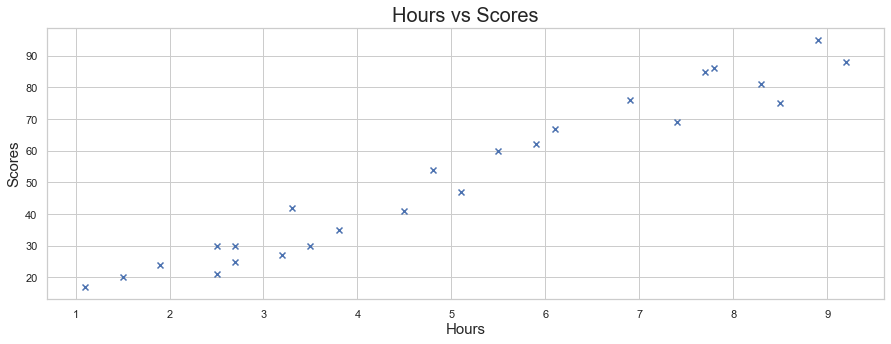

In [3]:
#plotting the distribution
plt.figure(figsize=(15,5))
plt.scatter(df['Hours'],df['Scores'], marker = 'x')
plt.title("Hours vs Scores",fontdict={'fontsize':20})
plt.xlabel("Hours",fontdict={'fontsize':15})
plt.ylabel("Scores",fontdict={'fontsize':15})


### PREPARING THE DATA

In [4]:
#feature
X = df.iloc[:, :-1].values  
#response
y = df.iloc[:, 1].values

In [5]:
#splitting data into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)


### TRAINING THE MODEL

In [6]:
#importing
from sklearn.linear_model import LinearRegression
#instantiating
lr = LinearRegression()

In [7]:
#fitting the training dat
lr.fit(X_train,y_train)
print(f'Intercept: {lr.intercept_}')
print(f'Coefficient: {lr.coef_}')

Intercept: 2.018160041434683
Coefficient: [9.91065648]


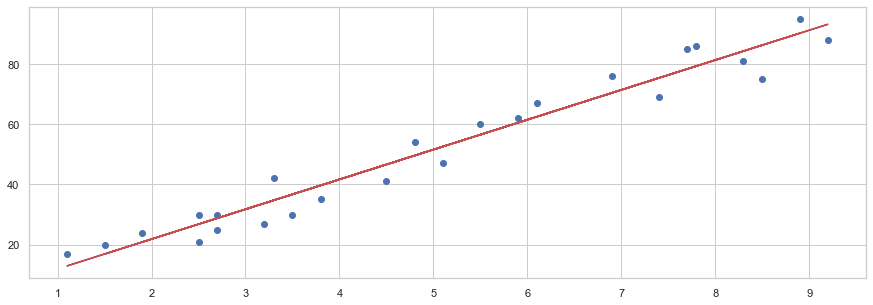

In [8]:
#plotting the regression fit
line = lr.intercept_ + X*lr.coef_
plt.figure(figsize=(15,5))
plt.scatter(X, y)
plt.plot(X, line,color = 'r');

### PREDICTIONS

In [9]:
#predictions
pred = lr.predict(X_test)
#residuals
residuals = y_test - pred

In [11]:
comparison = pd.DataFrame({'ActualValues': y_test, 'PredictedValues': pred, 'Residual': residuals})
comparison.reset_index(drop = True, inplace = True)
comparison


,ActualValues,PredictedValues,Residual
0,20,16.884145,3.115855
1,27,33.732261,-6.732261
2,69,75.357018,-6.357018
3,30,26.794801,3.205199
4,62,60.491033,1.508967


#### Positive values for the residual means the prediction was too low, and negative values mean the prediction was too high.
#### 0 means the prediction was exactly correct.


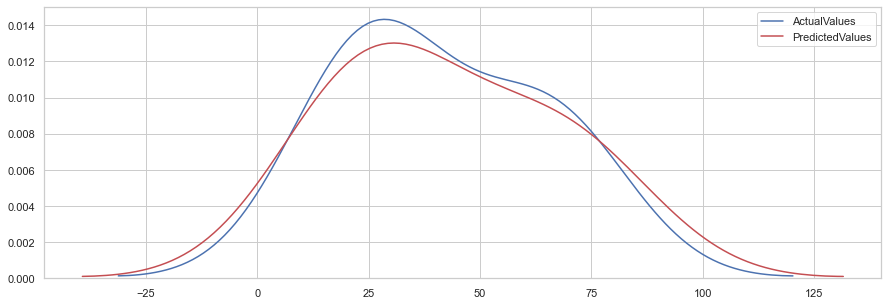

In [12]:
#comparing the predicted and actual values
plt.figure(figsize=(15,5))
sns.kdeplot(comparison['ActualValues'], color = 'b')
sns.kdeplot(comparison['PredictedValues'], color = 'r')


In [13]:
#subsequent prediction we wanted to make
hrs = [[9.25]]
final_pred = lr.predict(hrs)
print(f'Hours : 9.25')
print(f'Score : {final_pred[0]}')

Hours : 9.25
Score : 93.69173248737538


### EVALUATION

In [14]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred)))


Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665
